In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y = [0.540, 0.416, 0.989, 0.653, 0.283, 0.960, 0.145, 0.911, 0.839]
x = np.arange(len(y))

# valores dados en el ejercicio

### Método de interpolación de Lagrange

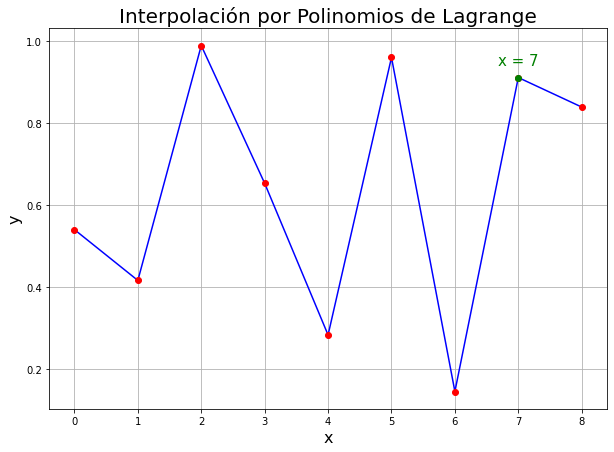

In [ ]:
from scipy.interpolate import lagrange
# Importar polinomios de Lagrange

f = lagrange(x, y)
# Ajustar polinomios a los datos

figure, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f(x), 'b', x, y, 'ro')
# graficar función

ax.plot(7, f(7), 'go')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_title("Interpolación por Polinomios de Lagrange", fontsize=20)

ax.text(7, f(7)+0.03, 'x = 7', color='green', ha="center", fontsize=15)
# Graficar función en punto x = 7

plt.grid()
plt.show()

Según Nieves A. (2005) "Los polinomios de Lagrange no se requiere resolver un sistema de ecuaciones lineale sy los cálculos se realizan directamente; entre estos se encuentra el de la aproximación polinomial de Lagrange". En un lenguaje de computadora la fórmula quedaría $P_n(x) = \sum_{i=0}^{n} L_i(x)f(x_i)$ donde $L_i(x) = \prod_{j=0} \frac{(x-x_j)}{(x_i - x_j)}$ donde $L_i$ representa la aproximación de polinomios de n-ésimo grado
concluye Nieves  que "Al combinarse linealmente $L(x)$ con $f(x)$, los polinomios $L(x)$ denominados polinomios de Lagrange, generan la aproximación polinomial de Lagrange a la información dada en forma tabular."

### Método por Trazadores Cúbicos

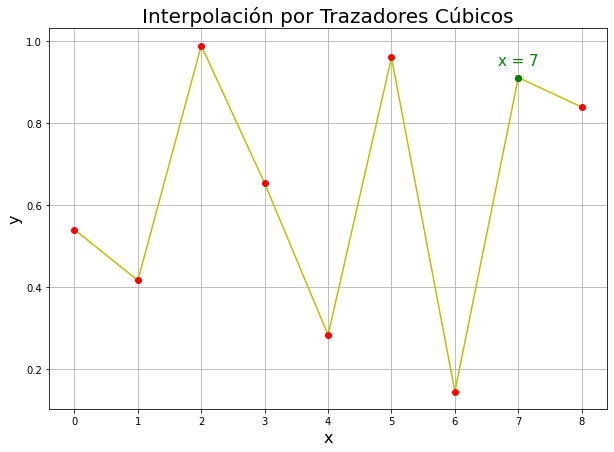

In [ ]:
from scipy.interpolate import CubicSpline
# Importar método de interpolación por trazadores cúbicos

f = CubicSpline(x, y)
# Ajustar interpolación a datos

figure, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f(x), 'y', x, y, 'ro')
ax.plot(7, f(7), 'go')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_title("Interpolación por Trazadores Cúbicos", fontsize=20)

ax.text(7, f(7)+0.03, 'x = 7', color='green', ha="center", fontsize=15)
# Graficar función en punto x = 7

plt.grid()
plt.show()

Según Miguel A. (2014) " Al igual que la interpolacion lineal a trozos, este procedimiento consiste en dividir el intervalo en una serie de subintervalos, y en cada subintervalo construir un polinomio diferente de aproximación. A esta forma de aproximar se le conoce como aproximacion polinómica fragmentaria. La aproximación polinómica fragmentaria más común utiliza polinios entre cada par consecutivo de nodos y recibe el nombre de interpolacion de trazadores cubicos. Es decir, en este caso los polinomios seran de grado 3. Un polinomio cúbico general contiene cuatro constantes $P(x) = \alpha x^3 + \beta x^2 + \gamma x + e  $ "

### Método de Interpolación de Newton

In [ ]:
def divided_diff(x, y):
    n = len(y)
    # iniciar variable n igual a número de elementos en y

    coef = np.zeros([n, n])
    # iniciar matriz de coeficientes n x n

    coef[:,0] = y
    # primera columna de la matriz de coeficientes igual a valor y
    
    for j in range(1,n):
        # por cada valor
        for i in range(n-j):

            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            # aplicar fórmula de polinomios de newton

    return coef

def newton_poly(coef, x_data, x):
    # función para evaluar polinomo en el punto x

    n = len(x_data) - 1 
    # iniciar variable n con valor #x_data - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
        # aplicar método de aproximación
    return p

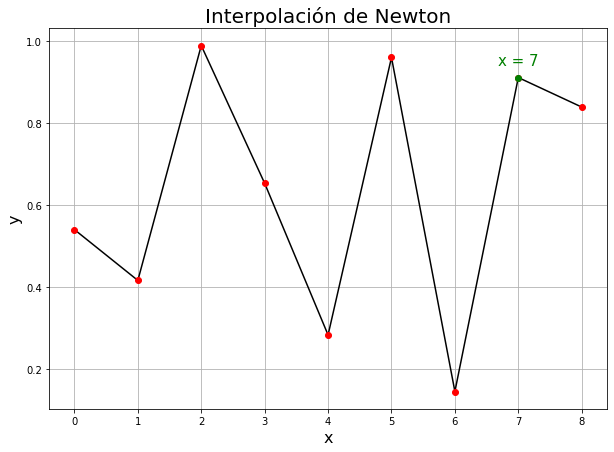

In [ ]:
a_s = divided_diff(x, y)[0, :]
y_hat = newton_poly(a_s, x, x)
y_hat_7 = newton_poly(a_s, x, 7)
figure, ax = plt.subplots(figsize=(10,7))
ax.plot(x, y_hat, 'black', x, y, 'ro')
ax.plot(7, y_hat_7, 'go')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_title("Interpolación de Newton", fontsize=20)
ax.text(7, f(7)+0.03, 'x = 7', color='green', ha="center", fontsize=15)
plt.grid()
plt.show()

Según Nieves A. (2005) "Los polinomios de interpolación de Newton de forma hacia adelante se puede determinar asumiendo la siguiente forma : $P_n(x) = a_0 + a_1(x - x_0) + a_2(x- x_0)(x-x_1) + ... + a_n(x-x_0)...(x-x_{n-1})$  donde los términos c_n se calculan mediante las diferencias divididas dada por la fórmula $a_1 = \frac{f|x_1| - f|x_0|}{x_1 - x_0} = f|x_0, x_1|$" y $a_2 = \frac{\frac{f|x_2| - f|x_1|}{x_2-x_1} - \frac{f|x_1| - f|x_0|}{x_1-x_0}}{x_2 - x_0} = f|x_0, x_1, x_2|$ los coeficientes $a_0, a_1, a_n$ están dados por

$a_0 = f|x_0| $
$a_1 = f|x_0, x_1|$
$a_2 = f|x_0, x_1, x_2|$
$a_n = f|x_0, x_1, x_2 ... x_n|$"

Afirma Nieves que se puede expresar sintéticamente como $p_n(x) = \sum_{k=0}^{n} a_k \prod_{i=0}^{k-1}(x-x_i)$

Fuentes bibliográficas:

Nieves A. Métodos numéricos: aplicados a la ingeniería. Grupo Editorial Patria
edición N°5, 2010

Miguel A. Análisis numéricos. Facultad de Matemáticas UAYD, 2014 